In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('car.data', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.shape

(1728, 7)

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Langkah utama ML
1. Prepare data
2. Pilih target variable(variabel apa yang ingin di prediksi)
3. Split menjadi test dan train(untuk masing masing x dan y)
4. Lakukan training model(training data)
5. Baru bisa melakukan prediksi(dengan sebelumnya kita cek dulu score pakai test)


In [ ]:
y = df['class']
x = df.drop(['class'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state= 42)

In [ ]:
y_train

1178    vgood
585     unacc
1552      acc
1169    unacc
1033    unacc
        ...  
1130    vgood
1294     good
860       acc
1459    unacc
1126      acc
Name: class, Length: 1209, dtype: object

### Encode variable

In [ ]:
from sklearn import preprocessing

In [ ]:
#Ordinal encoder -> data ordinal yang banyak
encoder = preprocessing.OrdinalEncoder()

In [ ]:
df['l'].value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

In [ ]:
buying_categories = ['low','med','high','vhigh']
maint_categories = ['low','med','high','vhigh']
doors_categories = ['2','3','4','5more']
persons_categories = ['2','4','more']
lug_boot_categories = ['small','med','big']
safety_categories = ['low','med','high']

encoder = preprocessing.OrdinalEncoder(categories=[buying_categories, maint_categories, doors_categories, persons_categories, lug_boot_categories,
                                                   safety_categories])


In [ ]:
x_train = encoder.fit_transform(x_train)

In [ ]:
x_test = encoder.fit_transform(x_test)

In [ ]:
car_class = ["acc","good","unacc","vgood"]
labelencoder = preprocessing.LabelEncoder()

In [ ]:
y_test_encoded = labelencoder.fit_transform(y_test)

In [ ]:
y_train_encoded = labelencoder.fit_transform(y_train)

In [ ]:
y_train_encoded

array([3, 2, 0, ..., 0, 2, 0])

# Pakai CART / Gini Index

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

# fit the model

clf_gini.fit(x_train,y_train_encoded)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(x_test)

In [ ]:
labelencoder.inverse_transform(y_pred_gini)

In [ ]:
#cek akurasi score
from sklearn.metrics import accuracy_score

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test_encoded, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7919


In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train_encoded, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.7916


In [ ]:
from sklearn import tree

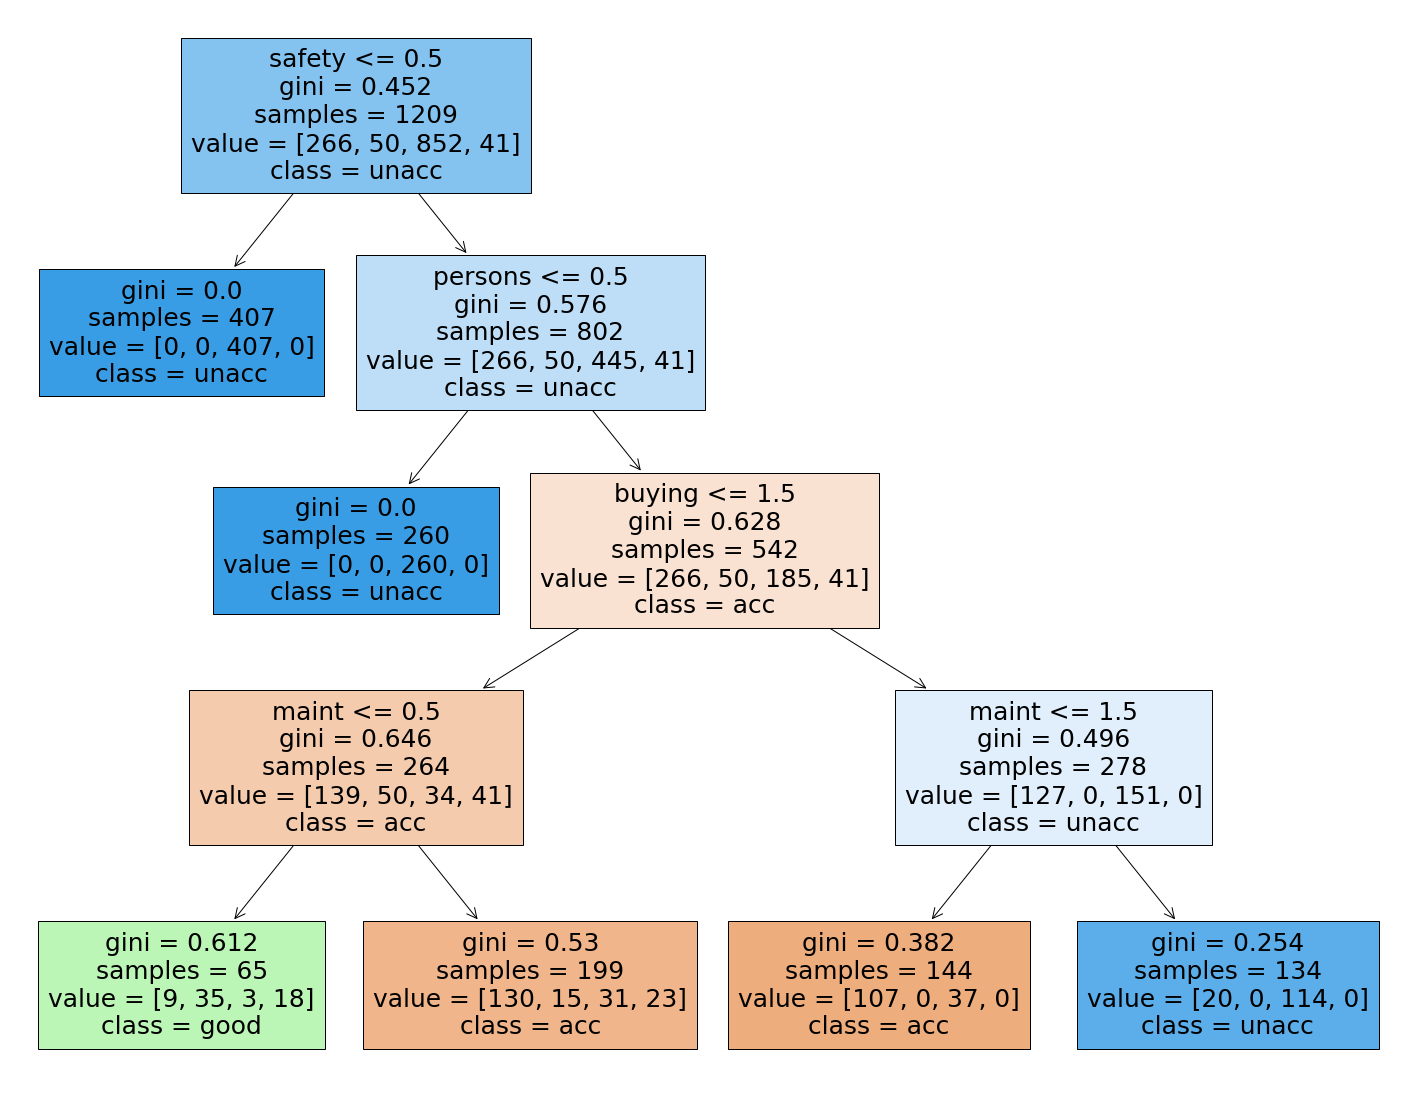

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=col_names,  
                   class_names=car_class,
                   filled=True)

# Entropy Measuring

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_en.fit(x_train, y_train_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [ ]:
# prediksi untuk test dan train
y_pred_en = clf_en.predict(x_test)
y_pren_train_en = clf_en.predict(x_train)

In [ ]:
labelencoder.inverse_transform(clf_en.predict([[3,3,0,0,0,0]]))

array(['unacc'], dtype=object)

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test_encoded, y_pred_en)))

Model accuracy score with criterion gini index: 0.8362


In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train_encoded, y_pren_train_en)))

Model accuracy score with criterion gini index: 0.8569


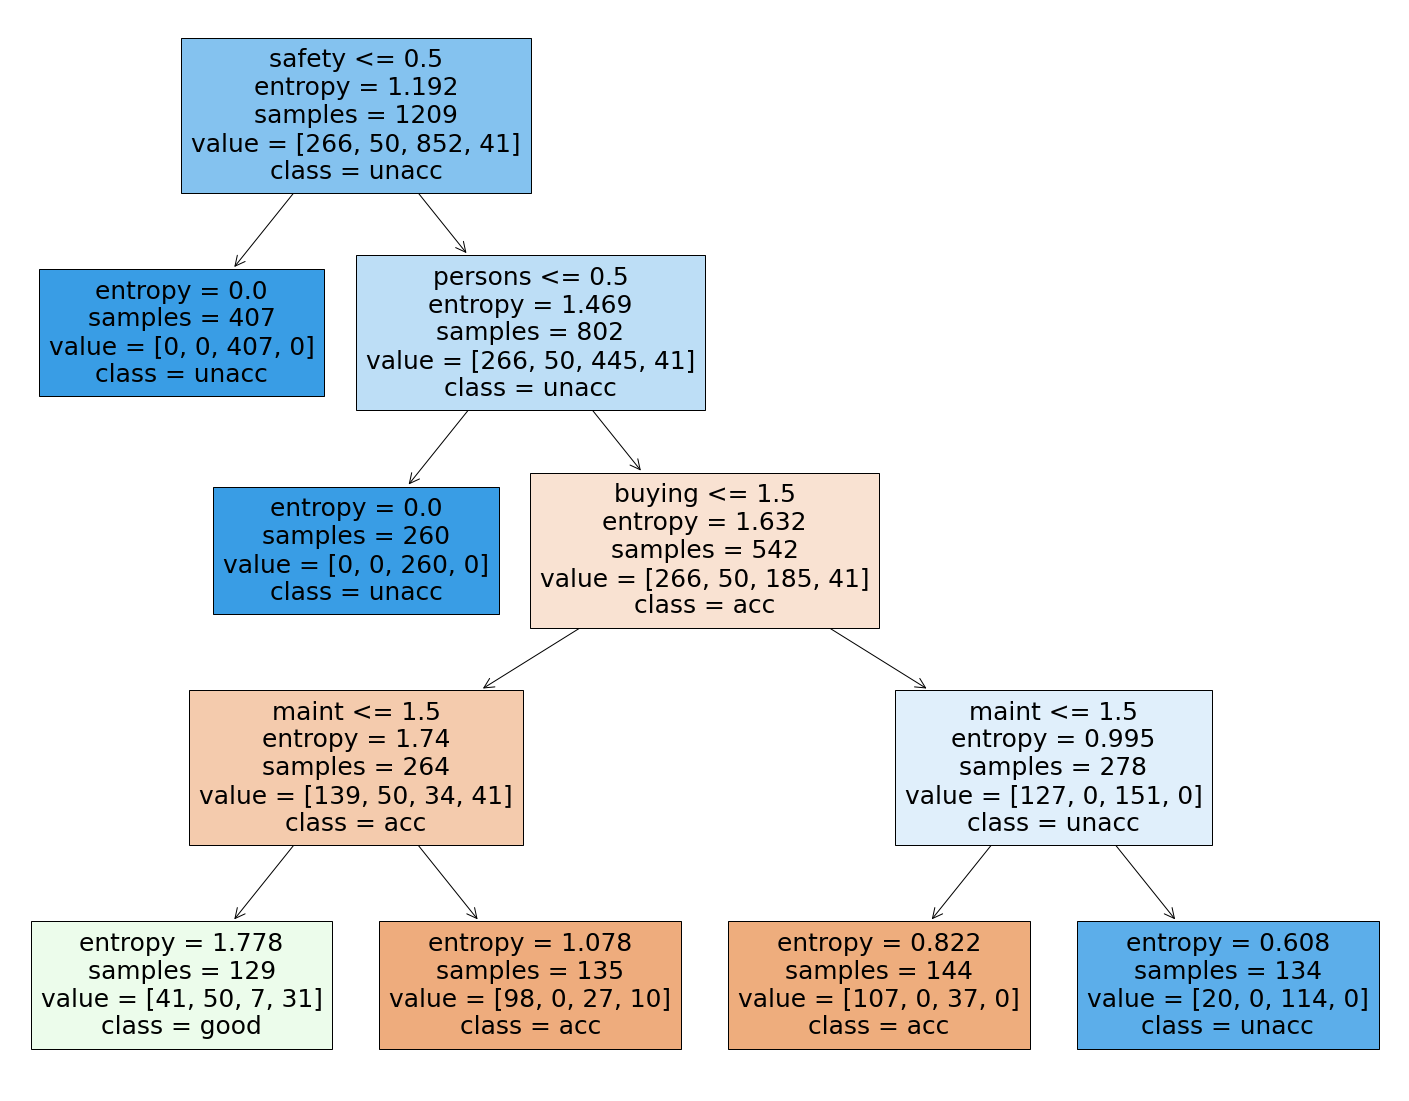

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_en, 
                   feature_names=col_names,  
                   class_names=car_class,
                   filled=True)